In [9]:
import pandas as pd
import numpy as np
import tensorly as tl
from tensorly.decomposition import tucker
import math
import matplotlib.pyplot as plt
import sys

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
import xgboost as xg
from scipy.fft import dct
sys.path.insert(1,'D:\TMU_codes\Thesis_codes\codes')


# from package.featureSelection_SICE import *
from package.loadDb import *
from package.featureSelection_TENSORIZED import *

In [11]:
address = "..\database\kaggleDataFrame"

data_with_target= load_kaggle_dataframe(address+"\dataframes.csv")

# extract a subset of dataset
# data_with_target=data_with_target.iloc[:4000]

data_without_target = data_with_target.drop(['DEMAND'],axis=1)



data_with_target.shape

(46968, 11)

In [12]:
window_size=10
#window_size
testSize=500
interval=2000
num_comp=4
col_percent=.2 # pecentage of last columns that will be deleted


In [13]:

pca_list=[]
fselection_list = []

start=0
end=interval

while data_with_target.shape[0] >= end:

    X=data_with_target.iloc[start : end,:-1]
    # print('X=',X.shape)
    new_data=generateData_svdOnFrequencySpace(X,window_size,num_comp,col_percent)    

    Y=data_with_target.iloc[start+window_size-1 : end,-1]
    # print('Y=',Y.shape)
    
    # X_pca=compute_pca(X,num_comp=num_comp)
    # Y_pca=data_with_target.iloc[start : end,-1]

    # if we ignore first samples that their targets arent used in our method:
    X_pca=compute_pca(X.iloc[window_size-1:],num_comp=num_comp)
    Y_pca=Y


    rmse_fselection=xgboost_reg_error(new_data,Y,testSize)

    rmse_pca=xgboost_reg_error(X_pca,Y_pca,testSize)
    
    pca_list.append(rmse_pca)
    fselection_list.append(rmse_fselection)
    print("-----------------------------------")
    start=start + interval
    end=end + interval 
        
print ("RMSE of QR_f_s model is:",np.array(fselection_list).round( decimals=2))
print ("RMSE of pca model is   :",np.array(pca_list).round( decimals=2))



data without target size is (2000, 10)
tensorized data size is (10, 10, 1991)
reduced tensorized data size = (8, 4, 1991)
-----------------------------------
data without target size is (2000, 10)
tensorized data size is (10, 10, 1991)
reduced tensorized data size = (8, 4, 1991)
-----------------------------------
data without target size is (2000, 10)
tensorized data size is (10, 10, 1991)
reduced tensorized data size = (8, 4, 1991)
-----------------------------------
data without target size is (2000, 10)
tensorized data size is (10, 10, 1991)
reduced tensorized data size = (8, 4, 1991)
-----------------------------------
data without target size is (2000, 10)
tensorized data size is (10, 10, 1991)
reduced tensorized data size = (8, 4, 1991)
-----------------------------------
data without target size is (2000, 10)
tensorized data size is (10, 10, 1991)
reduced tensorized data size = (8, 4, 1991)
-----------------------------------
data without target size is (2000, 10)
tensorized da

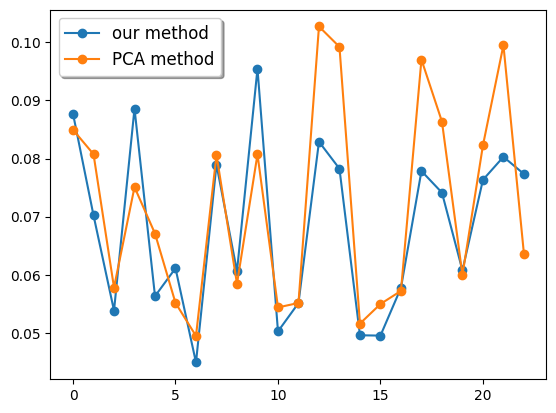

In [14]:
t = np.arange(len(fselection_list))
t.shape
fig, ax = plt.subplots()
ax.plot(t,fselection_list,marker = 'o', label='our method')

# Plot another line on the same chart/graph
ax.plot(t, pca_list,marker = 'o', label='PCA method')
legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
plt.show()

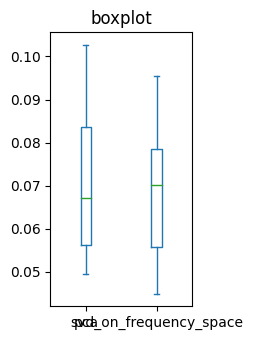

In [15]:

# Set the figure size
plt.rcParams["figure.figsize"] = [2.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data_plot = pd.DataFrame({"pca":np.array(pca_list) , "svd_on_frequency_space":np.array(fselection_list)})

# Plot the dataframe
ax = data_plot[['pca', 'svd_on_frequency_space']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()